In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import hough_line, hough_line_peaks
from skimage.transform import probabilistic_hough_line
from skimage.feature import canny
from skimage.draw import line as draw_line
from skimage import data
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
def intersection_over_union(line_pixels, hough_pixels):
    intersection = np.logical_and(line_pixels, hough_pixels)
    union = np.logical_or(line_pixels, hough_pixels)
    iou = np.sum(intersection) / np.sum(union)
    return iou

### Wyświetla Furiera obrazu ###
def Furia(n):
    obraz = Image.open(n)  # Podaj ścieżkę do swojego obrazu
    obraz = obraz.convert("L")  # Konwersja obrazu do odcieni szarości
    dane_obrazu = np.array(obraz)

    # Wykonanie analizy widmowej Fouriera
    widmo = np.fft.fftshift(np.fft.fft2(dane_obrazu))
    widmo_amp = np.abs(widmo)

    # Wizualizacja wyników
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(dane_obrazu, cmap='gray')
    plt.title('Obraz wejściowy')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(np.log(1 + widmo_amp), cmap='gray')
    plt.title('Widmo Fouriera')
    plt.axis('off')

    #plt.subplot(1, 3, 3)
    #plt.hist(widmo_amp_log.flatten(), bins=256, color='gray')
    #plt.title('Histogram')
    #plt.xlabel('Logarytm amplitudy')
    #plt.ylabel('Liczebność')
    #plt.grid(True)

    plt.tight_layout()
    plt.show()
    return np.log(1 + widmo_amp)

def linie(n):
    obraz = Image.open(n)  # Podaj ścieżkę do swojego obrazu
    obraz = obraz.convert("L")  # Konwersja obrazu do odcieni szarości
    dane_obrazu = np.array(obraz)

    # Wykonanie analizy widmowej Fouriera
    widmo = np.fft.fftshift(np.fft.fft2(dane_obrazu))
    widmo_amp = np.abs(widmo)

    # Wizualizacja wyników
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(dane_obrazu, cmap='gray')
    plt.title('Obraz wejściowy')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(np.log(1 + widmo_amp), cmap='gray')
    plt.title('Widmo Fouriera')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.hist(widmo_amp_log.flatten(), bins=256, color='gray')
    plt.title('Histogram')
    plt.xlabel('Logarytm amplitudy')
    plt.ylabel('Liczebność')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    
def ile_lini(obraz):
    #obraz = Image.open(n)  
    
    #obraz = obraz.convert("L")  
    dane_obrazu = obraz


    accumulator, angles, distances = hough_line(dane_obrazu)
    peaks = hough_line_peaks(accumulator, angles, distances)
    x0, y0, x1, y1 = 50, 100, 200, 150
    line_pixels = np.zeros_like(dane_obrazu, dtype=bool)
    line_pixels[y0:y1, x0:x1] = True
    iou_scores = []
    selected_lines = []
    cons=0
    for _, angle, dist in zip(*peaks):
        y_hough = (dist - np.arange(dane_obrazu.shape[1]) * np.cos(angle)) / np.sin(angle)
        x_hough = np.arange(dane_obrazu.shape[1])
        hough_pixels = np.zeros_like(dane_obrazu, dtype=bool)
        y_hough = np.round(y_hough).astype(int)
        valid_indices = np.where((y_hough >= 0) & (y_hough < dane_obrazu.shape[0]))
        y_hough = y_hough[valid_indices]
        x_hough = x_hough[valid_indices]
        hough_pixels[y_hough, x_hough] = True

        iou = intersection_over_union(line_pixels, hough_pixels)
        iou_scores.append(iou)

        if iou >= 0.007:  # Dostosuj wartość progową dla współczynnika zgodności
            selected_lines.append((angle, dist))
            cons=cons+1

    # Wyświetlenie najbardziej znaczących linii
    for angle, dist in selected_lines:
        y_hough = (dist - np.arange(dane_obrazu.shape[1]) * np.cos(angle)) / np.sin(angle)
        x_hough = np.arange(dane_obrazu.shape[1])
        y_hough = np.round(y_hough).astype(int)
        valid_indices = np.where((y_hough >= 0) & (y_hough < dane_obrazu.shape[0]))
        y_hough = y_hough[valid_indices]
        x_hough = x_hough[valid_indices]
        #plt.plot(x_hough, y_hough, '-r')

    #plt.imshow(dane_obrazu, cmap='gray')
    #plt.title('Najbardziej znaczące linie')
    #plt.axis('off')
    #plt.show()
    return cons

Program do analizy obrazu
Podaj ścieżkę do pliku obrazu (np. fields.jpg):
0.png


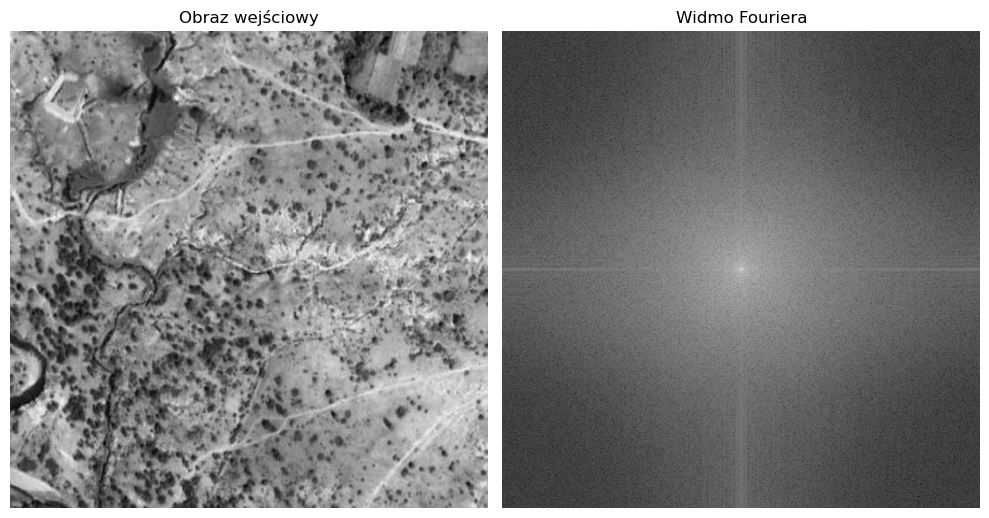

Działalność ludzka jest wątpliwa.
Liczba wykrytych linii: 2


In [3]:
def main():
    print("Program do analizy obrazu")
    print("Podaj ścieżkę do pliku obrazu (np. fields.jpg):")
    sciezka_do_obrazu = input()
    try:
        furr = Furia(sciezka_do_obrazu)
        liczba_linii = ile_lini(furr)

        if liczba_linii > 2:
            print("Działalność ludzka jest całkiem prawdopodobna.")
        else:
            print("Działalność ludzka jest wątpliwa.")

        print(f"Liczba wykrytych linii: {liczba_linii}")
    except Exception as e:
        print(f"Wystąpił błąd: {e}")

    
if __name__ == "__main__":
    main()

Program do analizy obrazu
Podaj ścieżkę do pliku obrazu (np. fields.jpg):
./2.png


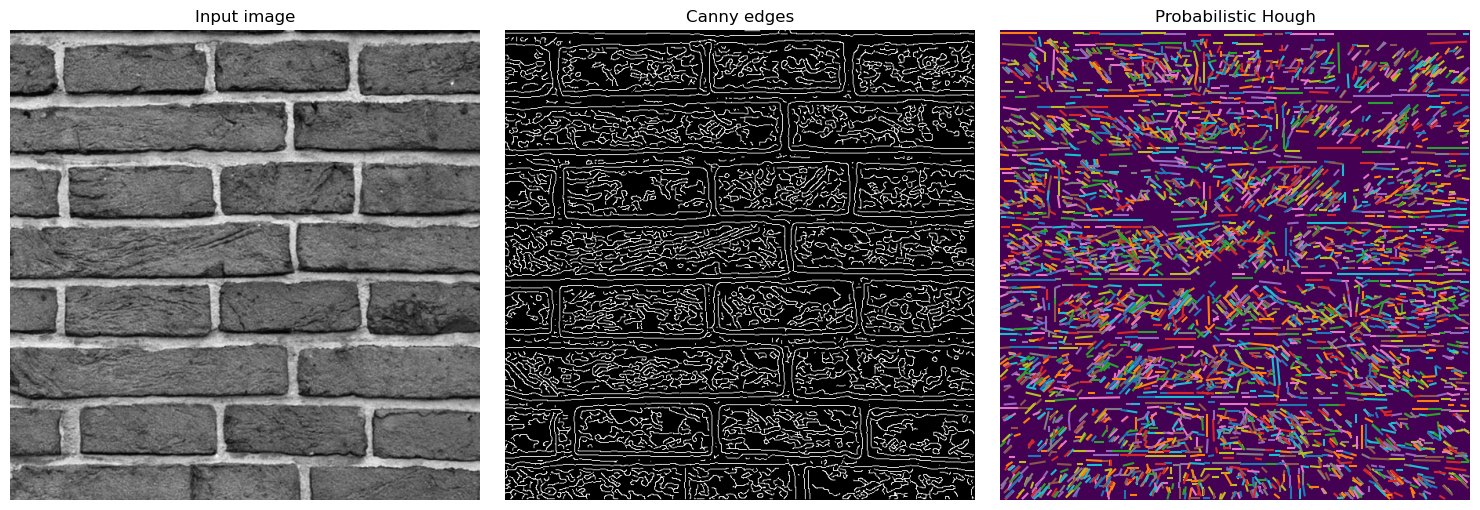

In [4]:
def load_and_process_image(file_path):
    img = Image.open(file_path)  # Wczytaj obraz
    img = img.convert("L")  # Konwersja obrazu na odcienie szarości
    img = np.array(img)  # Konwersja na tablicę numpy
    return img

def funfun(dane_obrazu):
    image = dane_obrazu
    edges = canny(image, 2, 1, 25)
    lines = probabilistic_hough_line(edges, threshold=10, line_length=5, line_gap=3)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(image, cmap=cm.gray)
    ax[0].set_title('Input image')

    ax[1].imshow(edges, cmap=cm.gray)
    ax[1].set_title('Canny edges')

    ax[2].imshow(edges * 0)
    for line in lines:
        p0, p1 = line
        ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
    ax[2].set_xlim((0, image.shape[1]))
    ax[2].set_ylim((image.shape[0], 0))
    ax[2].set_title('Probabilistic Hough')

    for a in ax:
        a.set_axis_off()

    plt.tight_layout()
    plt.show()

def main():
    print("Program do analizy obrazu")
    print("Podaj ścieżkę do pliku obrazu (np. fields.jpg):")
    sciezka_do_obrazu = input()
    try:
        image = load_and_process_image(sciezka_do_obrazu)  # Wczytaj i przetwórz obraz
        funfun(image)
    except Exception as e:
        print(f"Wystąpił błąd: {e}")

if __name__ == "__main__":
    main()